# Turing patterns

As an example of a system that exhibits Turing patterns, let us consider the activator–substrate depletion model (ASDM). This model involves two species: an activator and a substrate. The activator promotes its own production (autocatalysis) while consuming the substrate in the process, and it also undergoes standard degradation. The substrate, on the other hand, is produced at a constant rate only degrades as a result of its consumption by the activator.


$$\frac{\partial a}{\partial t} = d \Delta a + a^2s - a, \\ \frac{\partial s}{\partial t} = \Delta s + \mu (1-a^2s).$$

There exists a unique steady-state $a^* = s^* = 1$.

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

## 1. Plotting the linear stability diagram

We perform a linear stability analysis around this homoegenous steady-state. We look for solutions of the form:

$$a = a^* + \delta a = a^* + \delta a_0 e^{-ikx + \lambda t}\\ s = s^* + \delta s = s^* + \delta s_0 e^{-ikx + \lambda t},$$

with $\delta a_0, \delta s_0 \ll 1$. After linearizing the equations, we find that $\lambda$ is an eigenvalue of the linear stability matrix $A$:

$$A = \begin{pmatrix} 1 - dk^2 & 1 \\ -2 \mu &- \mu - k^2 \end{pmatrix}.$$

Because it's a 2D matrix, the eigenvalues can be written

$$\lambda = \frac{1}{2} \left( \mathrm{tr} (A) \pm \sqrt{\mathrm{tr}^2 (A) - 4 \det (A)} \right).$$

To classify the behavior of the system we investigate the maximum growth rate attainable, $g^* = \max\limits_{k \geq 0} \Re(\lambda)$ and the value at which it is attained $k^* = \arg\max\limits_{k \geq 0} \Re(\lambda).$

If $g^* > 0$ and $k^* > 0$, the instability develop with finite wavelength: these are Turing patterns. If $g^* > 0$ and $k^* = 0$, the instability develops but remains homogeneous, there are no patterns. If $g^* < 0$, the steady-state solution is stable.

1. We note that $\mathrm{tr} (A) = 1 - \mu - dk^2 - k^2$, such that if $\mu < 1$ we are guaranteed that $g^* > 0$ because $\mathrm{tr}(A) > 0$ for $k = 0$. Indeed, no matter the value of the discriminant at $k=0$, we know that at least $\Re(\lambda(k=0)) > 0$, which means that $g^* > 0$.

2. We also have that if $\mu > 3 - 2\sqrt{2}$, $\lambda(k = 0)$ has a non-zero imaginary part, such that an oscillating instability can develop. This instability can be in competition with a purely real instability with $k > 0$. In this case, because the instabilities have different types, if they can be in competition it will depend on the initial condition.

3. Finally, when $\mu < 3 - 2 \sqrt{2}$, the discriminant is always positive, so there can't be oscillations in time. However, depending on the value of the parameters we can have $k^* = 0$ or $k^* > 0$.

**<font color='red'>Using this insights, plot the linear stability diagram. You will first need to generate a function `get_real_lambda(k,d,mu)` which returns the real part of the the eigenvalue lambda for a value of $k$, of $d$ and of $\mu$. You will then define the function `phase_diagram(d, mu)` which returns a specific flag (any integer works) if $k^* > 0$ and another flag if $k^* = 0$.</font>** You can also separate the different case $\mu > 1$, $1 > \mu > 3 - 2\sqrt{2}$ and $\mu < 3 -2\sqrt{2}$ since they correspond to different type of instabilities. Doing so, you should have 4 different regions: Turing pattern, homogeneous instability, stable, oscillatory.

In [18]:
def get_real_lambda(k, d, mu):

    """
    Computes the real part of the dominant eigenvalue λ(k) for the linearized ASDM model.

    This function evaluates the growth rate of Fourier modes of wavenumber k
    based on the Jacobian of the linearized dynamics and diffusion term.

    Parameters:
        k : np.ndarray
            Array of wavenumbers.
        d : float
            Diffusion coefficient for the activator.
        mu : float
            Growth rate of the substrate.

    Returns:
        Rlam : np.ndarray
            Array of the real part of the leading eigenvalue for each wavenumber.
    """
    det = (1 - d * k**2) * (-mu - k**2) + 2 * mu
    tr = 1 - (1 + d) * k**2 - mu

    Rlam = np.empty_like(k)
    disc = tr ** 2 - 4 * det
    where = disc < 0
    Rlam[where] = tr[where] / 2
    Rlam[~where] = (tr[~where] + np.sqrt(disc[~where])) / 2
    return Rlam

def phase_diagram(d, mu):

    """
    Classifies the system behavior for given diffusion d and growth rate μ.
    It returns an integer label corresponding to the six possible regimes:
    Turing pattern, homogeneous instability, stable, oscillatory

    Inputs:
        d : float
            Diffusion coefficient of the activator.
        mu : float
            Growth rate of the substrate.

    Returns:
        label : int
            Integer identifier for the dynamical regime.
    """


    k = np.linspace(0, 4, 200)
    Rlam = get_real_lambda(k, d, mu)

    gstar = Rlam.max()
    kstar = Rlam.argmax()
    patterns = True if kstar > 0 else False

    label = None
    # Determine which region has patterns and which
    if mu > 1:
        label = 0 if gstar > 0 else 1

    # Determine which region has the oscillatory instability (k = 0, lambda imaginary),
    # and which region has both oscillatory and patterns
    if 3 - 2 * np.sqrt(2) < mu < 1:
        label = 0 if kstar > 0 else 3

    # Determine which region has patterns and which region is homogeneous
    if mu < 3 - 2 * np.sqrt(2):
        label = 0 if kstar > 0 else 4

    return label

In [19]:
mus = np.linspace(0.01, 2, 300)
ds = np.linspace(0.01, 1, 300)


d, mu = np.meshgrid(ds, mus)
im = np.empty_like(d)
for i in range(len(mus)):
    for j in range(len(ds)):
        im[i, j] = phase_diagram(ds[j], mus[i])


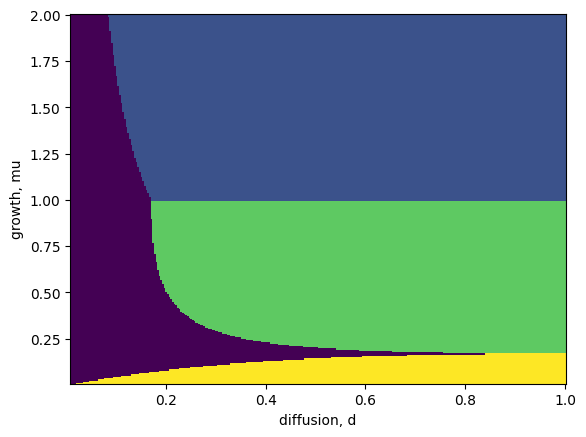

In [20]:
plt.figure()
plt.pcolor(ds, mus, im)
plt.xlabel('diffusion, d')
plt.ylabel('growth, mu')
plt.show()

## 2. Comparison with analytical predictions

With mathematica we can find the maximum of $\Re(\lambda)$ as a function of $k$, and then compute $g^*$. We have that there always exists an extremum at $k > 0$ for $3 - 2 \sqrt{2} < \mu < 2$ and $0 < d < 1$. This value and the value for the corresponding maximum read

$$
k^* = \sqrt{\frac{1 + \mu - \sqrt{2 \mu/d}(d+1)}{d - 1}} \\
g^* = \frac{1 + d \mu - 2 \sqrt{2 d \mu}}{1 - d}
$$

**<font color='red'>Using this value for $g^*$, you compare it to the $0$ to derive the boundaries of the different phases in for $3 - 2 \sqrt{2} < \mu < 2$ and $0 < d < 1$.</font>** **<font color='red'>For $\mu < 3 - 2\sqrt{2}$ the boundary between the Turing patterns and the homogeneous instability can be calculated by finding the value of the parameters for which the value of $k^*$ above reaches zero. Doing so, obtain the three boundaries analytically and superimpose them on the phase diagram in the cells below.</font>**

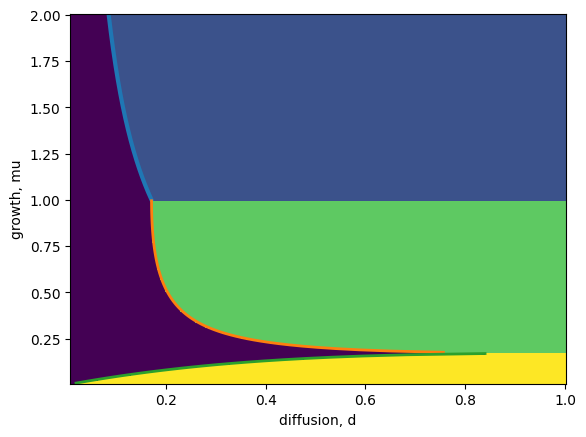

In [ ]:
b1 = mus > 1
d_b1 = (np.sqrt(2) - 1)**2/mus[b1]

b2 = (mus > 3 - 2*np.sqrt(2)) & (mus < 1)
d_b2 = -(1 + (-14 + mus[b2])*mus[b2] + 4*np.sqrt(2)*np.sqrt(-mus[b2]*(1+(-6 + mus[b2])*mus[b2])))/(1 + mus[b2])**2

b3 = (mus < 3 - 2*np.sqrt(2))
d_b3 = ((1+mus[b3])/(np.sqrt(2*mus[b3])) - np.sqrt((1+mus[b3])**2/(2*mus[b3]) - 4))**2/4

plt.figure()
plt.plot(d_b1, mus[b1], linewidth = 3)
plt.plot(d_b2, mus[b2], linewidth = 2)
plt.plot(d_b3, mus[b3], linewidth = 2)
plt.pcolor(ds, mus, im)
plt.xlabel('diffusion, d')
plt.ylabel('growth, mu')
plt.show()

## 3. Plotting the real part of $\lambda$ in the different phases

**<font color='red'>For one set of parameters for each region plot the real part of $\lambda$ as a function of $k$. Use the following set of parameters, $(d, mu)$:</font>** $(0.05, 0.1), (0.4, 0.1), (0.05, 0.5), (0.4, 0.5), (0.05, 1.4), (0.4, 1.4)$. On each of these plot, overlay the analtyical prediction for $k^*$. Except for one of the phases where this prediction doesn't hold, it should correspond the value at which $\Re(\lambda)$ is maximum.

/tmp/ipython-input-21-2910633760.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


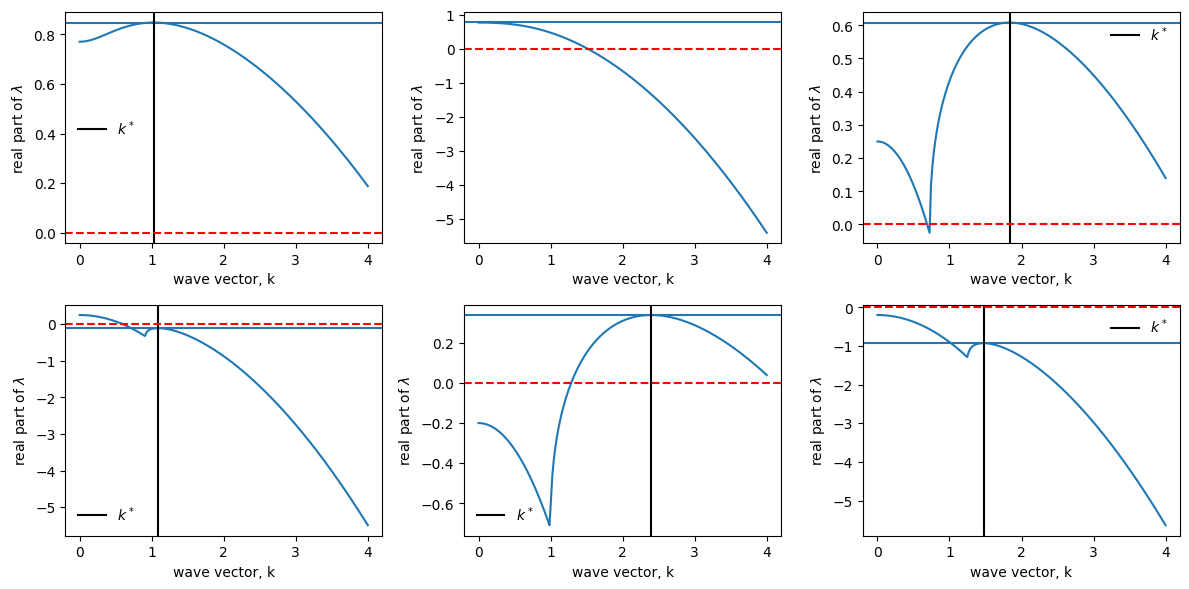

In [21]:
def get_kstar(d, mu):

    """
    Analytically computes the predicted most unstable wavenumber k*,
    valid in the weakly nonlinear regime.

    Inputs:
        d : float
            Diffusion coefficient of the activator.
        mu : float
            Growth rate of the substrate.

    Returns:
        k_star : float or None
            Most unstable wavevector if it exists; None otherwise.
    """

    x = (1 + mu - np.sqrt(2*mu/d)*(1+d))/(d - 1)
    k_star = None

    if x >= 0:
        k_star = np.sqrt(((1 + mu - np.sqrt(2*mu/d)*(1+d))/(d - 1)))

    return k_star

fig, axes = plt.subplots(figsize=(12,6),nrows = 2, ncols = 3)

k = np.linspace(0, 4, 200)
parameters = [(0.05, 0.1), (0.4, 0.1), (0.05, 0.5), (0.4, 0.5), (0.05, 1.4), (0.4, 1.4)] #[d,mu]

for (d, mu), ax in zip(parameters, axes.flatten()):

    ax.plot(k, get_real_lambda(k, d, mu), '-')
    ax.axhline(y = (1 + d*mu - 2*np.sqrt(2*d*mu))/(1-d))
    kstar = get_kstar(d, mu)
    if kstar is not None:
        ax.axvline(x = kstar, color='k', label=r'$k^*$')
    ax.axhline(y = 0, linestyle = '--', color = 'r')
    ax.set_xlabel(r'wave vector, k')
    ax.set_ylabel(r'real part of $\lambda$')
    ax.legend(frameon=False)
plt.tight_layout()

## 4. 1D finite difference simulations of Turing patterns

Now you will simulate via finite differences the ASDM model, first in 1D, and you will explore the Turing pattern regime with $d = 0.05, \mu = 1.4$. The system can be rewritten in the following way:

$$
\frac{\partial Y}{\partial t} = F(Y), \text{ with } Y = \begin{pmatrix}a \\ s \end{pmatrix}, \text{ and } F(Y) = \begin{pmatrix} d \Delta a + a^2 s -a \\ \Delta s + \mu(1 - a^2 s) \end{pmatrix}
$$


Finite differences are a way to approximate derivatives. For instancem, in 1D, for the activator $a$, on a grid with spacing $\Delta x$ the derivative of a $\partial_x a

$$
\partial_x a(x,t) \simeq \frac{a(x + \Delta x,t) - a(x,t)}{\Delta x}
$$

Similarly, the second order derivative (laplacian in one dimension) can be written as:

$$
\partial^2_x a = \Delta a \simeq \frac{a(x + \Delta x,t) + a(x - \Delta x,t) - 2a(x,t)}{\Delta x²}
$$

And we are guaranteed that these approximations are exact in the limit $\Delta x \rightarrow 0$. The integration of the equations in time can be done by Euler time-stepping:

$$
Y(t+\Delta t) = Y(t) + \Delta t F(Y(t))
$$

**<font color='red'>You will simulate a system of length $L = 20$, with $N = 128$ points (hence with $\Delta x = L/(N-1)$), time step $\Delta t = 0.001$ and for a duration $T = 100$, and $d = 0.05, \mu = 1.4$</font>** You will initialize the system as a small perturbation ($10^{-3}$) around the steady-state values $a^* = 1$, $s^* = 1$ of $a$ and $s$.

In [22]:
def laplacian(X, dx):
    """
    Computes the finite-difference Laplacian of a field with periodic boundary conditions.

    Inputs:
        X : ndarray
            Input array of shape (time, space)
        dx : float
            Grid spacing.

    Returns:
        L : ndarray
            Laplacian of X, same shape as input.
    """

    n = len(X.shape) - 1
    L = 0

    for i in range(n):
        L += np.roll(X, 1, axis=i+1) + np.roll(X, -1, axis=i+1) - 2*X

    L /= dx**2
    return L


def asdm_force(X, dx, args):

    """
    Computes the ASDM force field for the current state X and parameters.

    Inputs:
        X : ndarray
            Array of shape (time, 2, space) for [a, s], X[:,0,:] is field a(x,t) and X[:,1,:] is s(x,t)
        dx : float
            Grid spacing.
        args : tuple
            Model parameters (d, μ).

    Returns:
        dX : ndarray
            Time derivative (force) of X.
    """
    dXdt = np.empty_like(X)

    d, mu = args
    La = laplacian(X[:,0,:], dx)
    Ls = laplacian(X[:,1,:], dx)
    a2s = X[:,1,:]*X[:,0,:]**2
    dXdt[:,0,:] = (d * La + a2s - X[:,0,:])
    dXdt[:,1,:] = (1 * Ls + mu * (1 - a2s))

    return dXdt

def simulate(X0, force_args, force_function=asdm_force, N=32, T=5000, dt=0.005, L=50,
             num=100):
    """
    Simulates the ASDM system over time using Euler time-stepping and returns the trajectory.

    Inputs:
        X0 : ndarray
            Initial condition, shape (2, space), ie (2, N)
        force_args : tuple
            Parameters for the force function (e.g., (d, μ)).
        force_function : callable
            Function to compute the time derivative.
        N : int
            Grid size.
        T : float
            Total simulation time.
        dt : float
            Time step.
        L : float
            Length of the domain.
        num : int
            Store one frame every 'num' steps.

    Returns:
        trajectory : ndarray
            Array of stored timepoints, shape (time, 2, N) or (time, 2, N, N).
    """
    dx = L / (N - 1)

    X = X0[None,:]
    trajectory = []

    n_iter = int(T/dt)

    for i in tqdm(range(n_iter)):
        force = force_function(X, dx, force_args)
        X += dt * force

        if i % num == 0:
            trajectory.append(X[0,:].copy())

    trajectory = np.array(trajectory)
    return trajectory



In [23]:
dt=0.001
L=20.0
N=128
T=80
force_args=(0.05, 1.4)

np.random.seed(42)
a0 = np.ones(N) + 1e-6*np.random.normal(size = N)
s0 = np.ones(N) + 1e-6*np.random.normal(size = N)

num = 70
X = simulate(np.array([a0, s0]), force_args, N=N, T=T, dt=dt, L=L, num=num)


100%|██████████| 80000/80000 [00:07<00:00, 10990.36it/s]


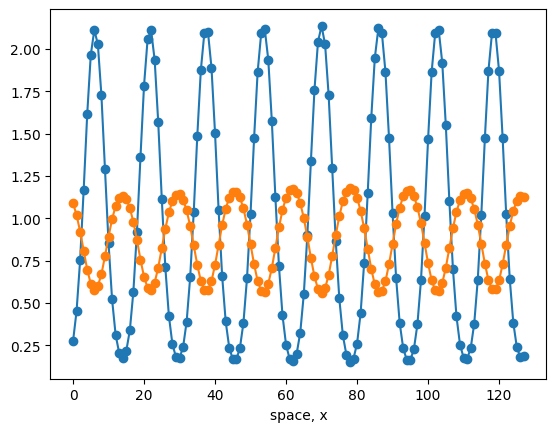

In [25]:
plt.figure()
plt.plot(X[-1,0,:], 'o-')
plt.plot(X[-1,1,:], 'o-')
plt.xlabel('space, x')
plt.show()

## 5. Wavenumber selection, comparison between linear and non-linear theory

**<font color='red'>Using the last time point of the simulation, compute the typical wavenumber $k = 2\pi/\lambda$ with the discrete fourier transform.</font>** Compare this to the prediction $k^*$ for the linear theory with the same parameters used for the simulation. With the set of parameters $(0.05, 1.4)$ the solution is weakly non-linear, and the wave number selected is not too far from the one predicted by the theory. As we decrease $d$ it gets more clearly non-linear. For $(d, \mu) = (0.05, 1.4)$ the wave number selected by the instability clearly deviates more from the prediction of the linear theory than when the solution looks more sinusoidal. The problem of predicting the exact wavenumber selected is still an open question in the study of dynamical systems.

In [ ]:
def estimate_kstar(X, dx):
    """
    Estimates the dominant wavenumber of a spatial pattern.

    Inputs:
        X : ndarray
            Input 1D spatial profile (e.g., last frame of activator concentration).
        dx : grid spacing (assumed isotropic)

    Returns:
        k_star : float
            Dominant wavenumber 2π/λ.
    """

    X = X - np.mean(X)
    freqs = np.fft.rfftfreq(len(X), d=dx)
    spectrum = np.abs(np.fft.rfft(X))**2
    peak_idx = np.argmax(spectrum)
    k_estimated = 2*np.pi*freqs[peak_idx]
    return k_estimated

In [ ]:

print('selected mode from linear theory', get_kstar(0.1, 1.4))
print('selected mode in practice (non-linear effects matter)', estimate_kstar(X[-1,0,:], L/(N-1)))

selected mode from linear theory 1.9495449281939559
selected mode in practice (non-linear effects matter) 2.493639168786898


## 6. 2D finite difference simulations of Turing patterns

**<font color='red'>Extend your finite difference simulation to a 2D setting.</font>** You will use the step grid size in $x$ and $y$ direction. The approximation for the Laplacian can be extended easily from one dimension:

$$
\partial^2_x a + \partial^2_y a = \Delta a \simeq \frac{a(x + \Delta x,y,t) + a(x - \Delta x,y,t) + a(x,y +\Delta y,t) + a(x,y - \Delta y, t) - 4 a(x,y,t)}{\Delta x^2}
$$

You will use for each dimension length $L=20$ and $N=128$ points, the time step is $\Delta t = 0.001$ and total simulation time $T = 80$.

In [ ]:
dt=0.001
L=20
N=128
T=80
force_args=(0.05, 1.4)

np.random.seed(0)
a0 = np.ones((N,N)) + 1e-4*np.random.normal(size = (N,N))
s0 = np.ones((N,N)) + 1e-4*np.random.normal(size = (N,N))

num = 70
X = simulate(np.array([a0, s0]), force_args, N=N, T=T, dt=dt, L=L, num=70)

100%|██████████| 80000/80000 [00:44<00:00, 1780.13it/s]


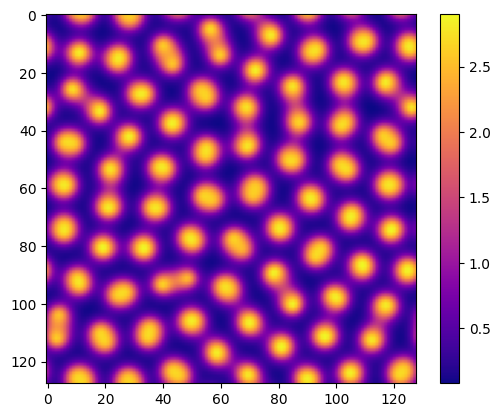

In [ ]:
plt.figure()
im = plt.imshow(X[-1,0,:], cmap='plasma')
plt.colorbar(im)
plt.show()

## 7. Summarizing the phase-diagram with simulations

You will explore the different phases for this set of parameters $(d,\mu)$: $(0.05, 0.1), (0.4, 0.1), (0.05, 0.5), (0.4, 0.5), (0.05, 1.4), (0.4, 1.4)$. Each of this parameter corresponds to one of the phases. **<font color='red'>For each of this parameter run a simulation, plot the mean value over the domain of substrate concentration as a function of time.</font>** You will also plot the last value of the simulation. You should see patterns in the phases you expect patterns according to your prior analysis. With the mean value plot you should also be able to see which phases are stable and which are unstable.

In [ ]:
parameters = [(0.05, 0.1), (0.4, 0.1), (0.05, 0.5), (0.4, 0.5), (0.05, 1.4), (0.4, 1.4)]
Xs = []
mean_X = []

for force_args in parameters:

    X = simulate(np.array([a0, s0]), force_args, N=N, T=T, dt=dt, L=L, num=num)
    Xs.append(X[-1,1,:].copy())
    mean_X.append(X[:,1,:].mean(axis = (1,2)))

100%|██████████| 80000/80000 [00:43<00:00, 1850.88it/s]


(1143, 128, 128)


100%|██████████| 80000/80000 [00:51<00:00, 1539.01it/s]


(1143, 128, 128)


100%|██████████| 80000/80000 [00:44<00:00, 1811.84it/s]


(1143, 128, 128)


100%|██████████| 80000/80000 [00:45<00:00, 1765.04it/s]


(1143, 128, 128)


100%|██████████| 80000/80000 [00:43<00:00, 1819.73it/s]


(1143, 128, 128)


100%|██████████| 80000/80000 [00:45<00:00, 1743.88it/s]


(1143, 128, 128)


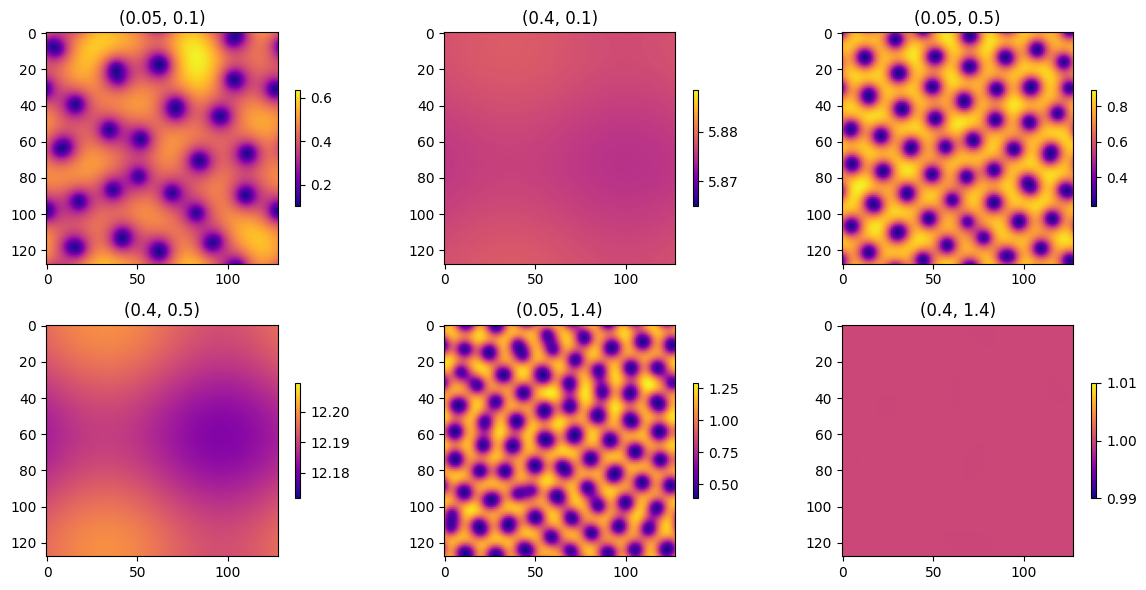

In [ ]:
fig, axes = plt.subplots(figsize=(12,6),nrows = 2, ncols = 3)

for force_args, ax, X in zip(parameters, axes.flatten(), Xs):

    im = ax.imshow(X, cmap='plasma', vmin=X.min()-0.01, vmax=X.max()+0.01)
    fig.colorbar(im, ax=ax, shrink = 0.5)
    ax.set_title(force_args)

plt.tight_layout()

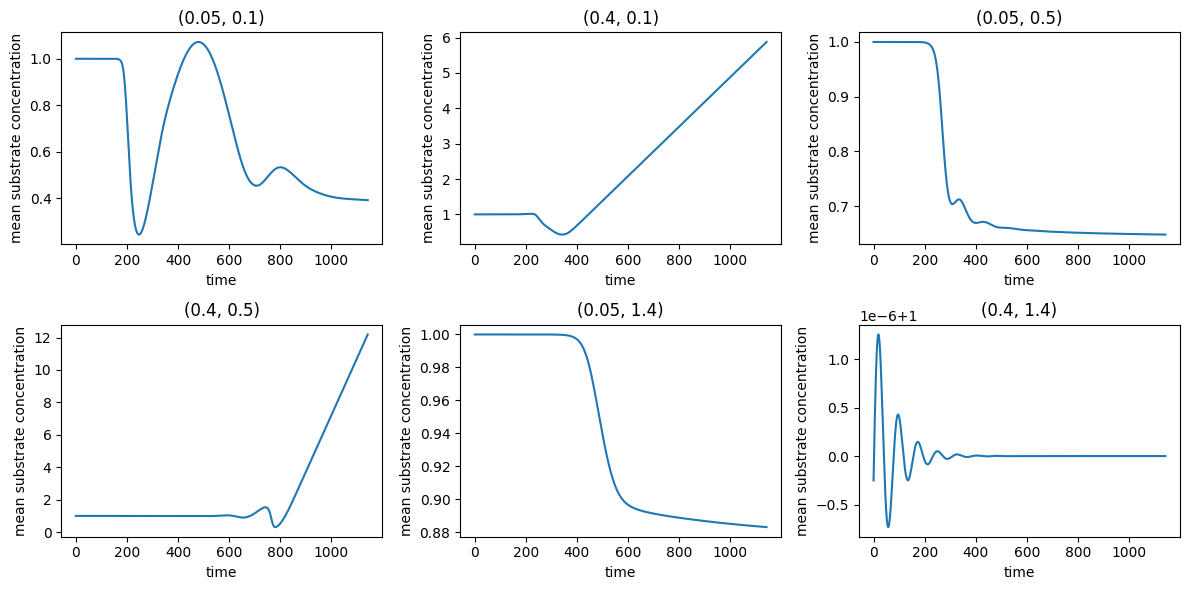

In [ ]:
fig, axes = plt.subplots(figsize=(12,6),nrows = 2, ncols = 3)

for force_args, ax, mean in zip(parameters, axes.flatten(), mean_X):

    t = np.arange(0,mean.shape[0])
    ax.plot(np.arange(0,mean.shape[0]), mean)
    ax.set_title(force_args)
    ax.set_ylabel('mean substrate concentration')
    ax.set_xlabel('time')
plt.tight_layout()

## 8. Drawing new Turing patterns by introducing saturation of the autocatalysis

Now you can slightly modify the ASDM model to include the possibility of saturation of the autocatalysis of the activator species $a$. This is done by introducing a parameter $\kappa > 0$ and a Hill function for the autocatalysis of the activator. The equations read:

$$\frac{\partial a}{\partial t} = d \Delta a + \frac{a^2s}{1 + \kappa a^2} - a, \\ \frac{\partial s}{\partial t} = \Delta s + \mu (1-\frac{a^2s}{1 + \kappa a^2}).$$

**<font color='red'>Modify the force of the asdm model to account for this new effect, and run new simulations in 2D with parameters $\kappa = 0.1, d = 0.05, \mu = 1.4, N = 64, T = 80$.</font>** Plot the resulting 2D field. You should now see a different type of pattern with stripes.

In [ ]:
def force_asdm_full(X, dx, force_args):
    """
    Computes the ASDM force with a saturating nonlinearity using a Hill function.

    Inputs:
        X : ndarray
            Input state array (time, 2, space).
        dx : float
            Grid spacing.
        force_args : tuple
            Model parameters (d, μ, κ).

    Returns:
        dXdt : ndarray
            Computed time derivative at each point.
    """

    dXdt = np.empty_like(X)
    d, mu, K = force_args

    La = laplacian(X[:,0,:], dx)
    Ls = laplacian(X[:,1,:], dx)
    a2s = X[:,1,:]*X[:,0,:]**2
    dXdt[:,0,:] = (d * La + a2s/(1+K*X[:,0,:]**2) - X[:,0,:])
    dXdt[:,1,:] = (1 * Ls + mu * (1 - a2s/(1 + K*X[:,0,:]**2)))

    return dXdt

In [ ]:
dt=0.001
L=20.0
N=64
T=80
force_args=(0.05, 1.4, 0.1)
homo_ss = np.array([1.0,1.0])

np.random.seed(42)
a0 = np.ones((N,N)) + 1e-4*np.random.normal(size = (N,N))
s0 = np.ones((N,N)) + 1e-4*np.random.normal(size = (N,N))

num = 50
X = simulate(np.array([a0, s0]), force_args, force_function=force_asdm_full, N=N, T=T, num=num, dt=dt, L=L)

100%|██████████| 80000/80000 [00:24<00:00, 3243.49it/s]


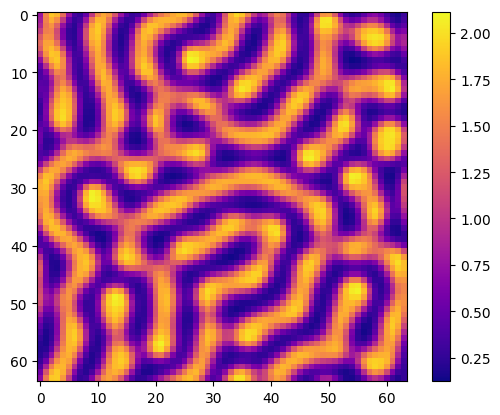

In [ ]:
plt.figure()
im = plt.imshow(X[-1,0,:], cmap='plasma')
plt.colorbar(im)
plt.show()